# Index
1.Accuracy

2.Confusion Matrix

3.Evaluation metrics in sklearn - accuracy , precision , recall , f1

4.Training and Testing - splitting the dataset

5.ROC Curve - sensitivity , specificity , changing the threshold

6.K-Folds Cross Validation

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

# Accuracy

Accuracy is a very straightforward and easy to understand metric, however it’s not always the best one. For example, let’s say I have a model to predict whether a credit card charge is fraudulent. Of 10000 credit card chards, we have 9900 legitimate charges and 100 fraudulent charges. I could build a model that just predicts that every single charge is legitimate and it would get 9900/10000 (99%) of the predictions correct!

Accuracy is a good measure if our classes are evenly split, but is very misleading if we have imbalanced classes.

# Confusion Matrix

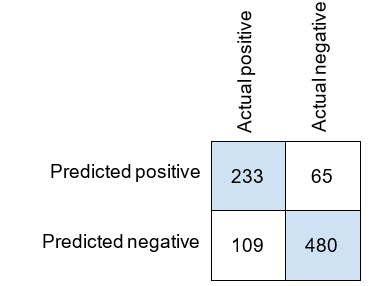

We can use the confusion matrix to compute the accuracy. As a reminder, the accuracy is the number of datapoints predicted correctly divided by the total number of datapoints

In [3]:
(233+480)*100/(233+65+109+480)        #accuracy

80.38331454340474

A true positive (TP) is a datapoint we predicted positively that we were correct about.

A true negative (TN) is a datapoint we predicted negatively that we were correct about.

A false positive (FP) is a datapoint we predicted positively that we were incorrect about.

A false negative (FN) is a datapoint we predicted negatively that we were incorrect about.

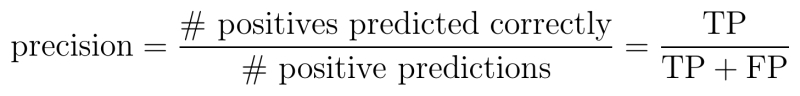

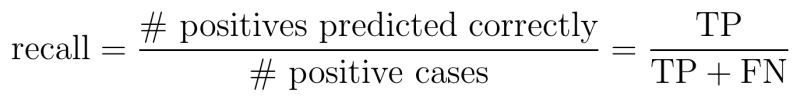

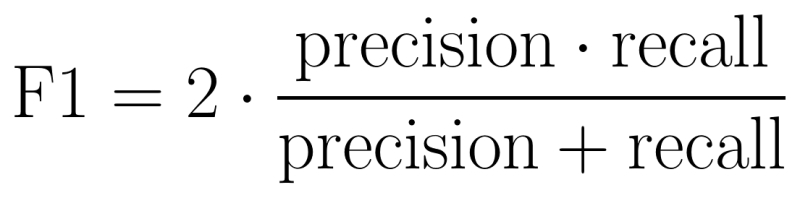

# Evaluation Metrics in sklearn

In [6]:
df = pd.read_csv('titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [8]:
print("accuracy:", accuracy_score(y, y_pred))
print("precision:", precision_score(y, y_pred))
print("recall:", recall_score(y, y_pred))
print("f1 score:", f1_score(y, y_pred))

accuracy: 0.8049605411499436
precision: 0.7734627831715211
recall: 0.6988304093567251
f1 score: 0.7342549923195083


In [10]:
print(confusion_matrix(y,y_pred))

[[475  70]
 [103 239]]


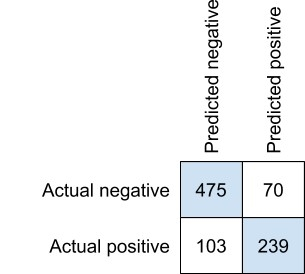

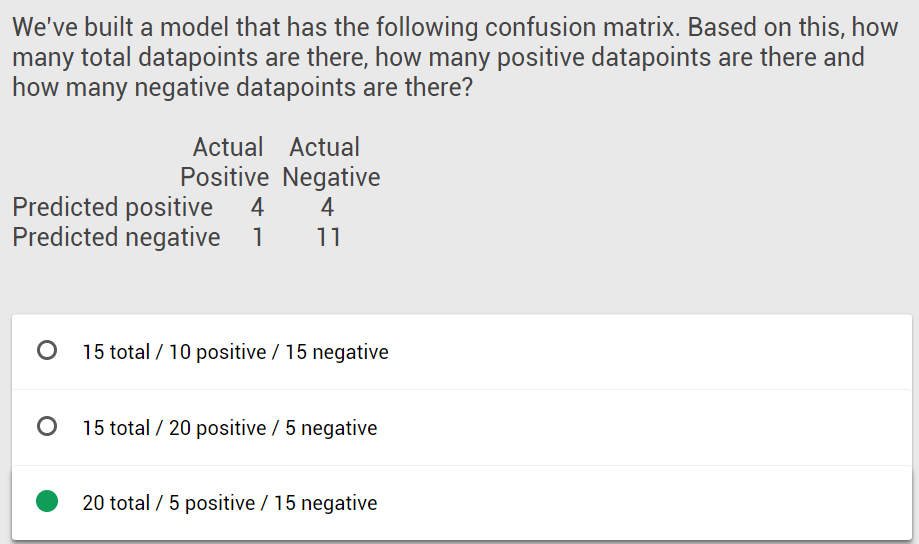

# Training & Testing

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
print("whole dataset:", X.shape, y.shape)
print("training set:", X_train.shape, y_train.shape)
print("test set:", X_test.shape, y_test.shape)

whole dataset: (887, 6) (887,)
training set: (665, 6) (665,)
test set: (222, 6) (222,)


In [18]:
model.fit(X_train,y_train)

LogisticRegression()

In [19]:
print(model.score(X_test,y_test))

0.8153153153153153


In [20]:
y_pred = model.predict(X_test)
print("accuracy:", accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("f1 score:", f1_score(y_test, y_pred))

accuracy: 0.8153153153153153
precision: 0.7536231884057971
recall: 0.6842105263157895
f1 score: 0.7172413793103448


Our accuracy, precision, recall and F1 score values are actually very similar to the values when we used the entire dataset. This is a sign our model is not overfit!

To get the same split every time, we can use the random_state attribute. We choose an arbitrary number to give it, and then every time we run the code, we will get the same split.

# ROC Curve

An ROC Curve is a graph of the sensitivity vs. the specificity. These values demonstrate the same trade-off that precision and recall demonstrate.

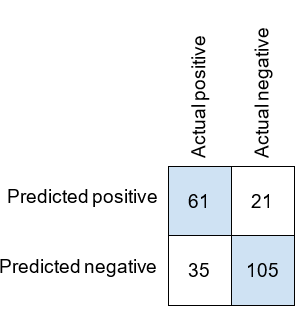

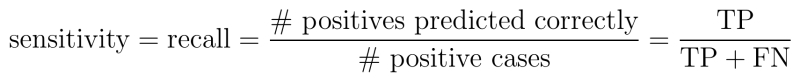

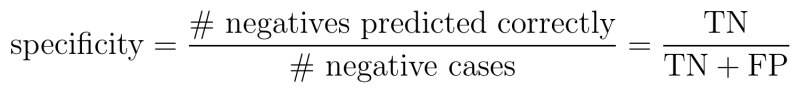

In [21]:
print("Sensitivity: ",61/96)
print("Specificity: ",105/126)

Sensitivity:  0.6354166666666666
Specificity:  0.8333333333333334


In [22]:
sensitivity_score = recall_score
print(sensitivity_score(y_test, y_pred))

0.6842105263157895


Now, to define specificity, if we realize that it is also the recall of the negative class, we can get the value from the sklearn function precision_recall_fscore_support.

In [25]:
print(precision_recall_fscore_support(y_test, y_pred))

(array([0.84313725, 0.75362319]), array([0.88356164, 0.68421053]), array([0.86287625, 0.71724138]), array([146,  76], dtype=int64))


The second array is the recall, so we can ignore the other three arrays. There are two values. The first is the recall of the negative class and the second is the recall of the positive class. The second value is the standard recall or sensitivity value, and you can see the value matches what we got above. The first value is the specificity. So let’s write a function to get just that value

array([0.88356164, 0.68421053])

Compute precision, recall, F-measure and support for each class

*The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
true positives and ``fp`` the number of false positives. The precision is
intuitively the ability of the classifier not to label as positive a sample
that is negative.

*The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of
true positives and ``fn`` the number of false negatives. The recall is
intuitively the ability of the classifier to find all the positive samples.

*The F-beta score can be interpreted as a weighted harmonic mean of
the precision and recall, where an F-beta score reaches its best
value at 1 and worst score at 0.

*The F-beta score weights recall more than precision by a factor of
``beta``. ``beta == 1.0`` means recall and precision are equally important.

The support is the number of occurrences of each class in ``y_true``.

In [26]:
#for specificity
def specificity_score(y_true, y_pred):
    p, r, f, s = precision_recall_fscore_support(y_true, y_pred)
    return r[0]
print(specificity_score(y_test, y_pred))

0.8835616438356164


In [27]:
model.predict_proba(X_test)

array([[0.94119181, 0.05880819],
       [0.91461058, 0.08538942],
       [0.89260622, 0.10739378],
       [0.05743568, 0.94256432],
       [0.87279179, 0.12720821],
       [0.89448842, 0.10551158],
       [0.6296629 , 0.3703371 ],
       [0.85202347, 0.14797653],
       [0.8068815 , 0.1931185 ],
       [0.08003223, 0.91996777],
       [0.20447812, 0.79552188],
       [0.36945879, 0.63054121],
       [0.59988411, 0.40011589],
       [0.27289205, 0.72710795],
       [0.79198669, 0.20801331],
       [0.11438816, 0.88561184],
       [0.87552769, 0.12447231],
       [0.07399692, 0.92600308],
       [0.73655446, 0.26344554],
       [0.70653219, 0.29346781],
       [0.30025771, 0.69974229],
       [0.32485543, 0.67514457],
       [0.90689936, 0.09310064],
       [0.06249354, 0.93750646],
       [0.35867266, 0.64132734],
       [0.87764266, 0.12235734],
       [0.83998269, 0.16001731],
       [0.92489758, 0.07510242],
       [0.03462388, 0.96537612],
       [0.2909626 , 0.7090374 ],
       [0.

The result is a numpy array with 2 values for each datapoint (e.g. [0.78, 0.22]). You’ll notice that the two values sum to 1. The first value is the probability that the datapoint is in the 0 class (didn’t survive) and the second is the probability that the datapoint is in the 1 class (survived). We only need the second column of this result, which we can pull with the following numpy syntax.

In [28]:
model.predict_proba(X_test)[:, 1]

array([0.05880819, 0.08538942, 0.10739378, 0.94256432, 0.12720821,
       0.10551158, 0.3703371 , 0.14797653, 0.1931185 , 0.91996777,
       0.79552188, 0.63054121, 0.40011589, 0.72710795, 0.20801331,
       0.88561184, 0.12447231, 0.92600308, 0.26344554, 0.29346781,
       0.69974229, 0.67514457, 0.09310064, 0.93750646, 0.64132734,
       0.12235734, 0.16001731, 0.07510242, 0.96537612, 0.7090374 ,
       0.73041031, 0.09352294, 0.65115825, 0.14841576, 0.37041413,
       0.14780948, 0.16016578, 0.08348451, 0.05739473, 0.06106984,
       0.52227916, 0.07510385, 0.16911384, 0.0800168 , 0.10409958,
       0.10033512, 0.05672737, 0.68047991, 0.24255796, 0.68004512,
       0.98465375, 0.13228889, 0.33346418, 0.82493361, 0.30745621,
       0.14295962, 0.19774516, 0.05637267, 0.12021142, 0.03516574,
       0.9378728 , 0.11772674, 0.05828648, 0.97490802, 0.44389955,
       0.50712798, 0.32916886, 0.49933806, 0.42011356, 0.14233484,
       0.32219298, 0.09646322, 0.57697317, 0.16565073, 0.66159

In [29]:
#Changing the threshold to 0.75
y_pred = model.predict_proba(X_test)[:, 1] > 0.75

In [30]:
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))

precision: 0.9
recall: 0.47368421052631576


The ROC curve is a graph of the specificity vs the sensitivity. We build a Logistic Regression model and then calculate the specificity and sensitivity for every possible threshold. Every predicted probability is a threshold. If we have 5 datapoints with the following predicted probabilities: 0.3, 0.4, 0.6, 0.7, 0.8, we would use each of those 5 values as a threshold.

Note that we actually plot the sensitivity vs (1-specificity)(x-axis). There is no strong reason for doing it this way besides that it’s the standard.

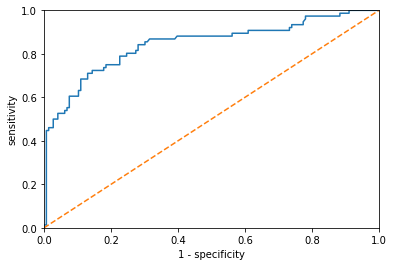

In [33]:
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.show()

The closer the curve gets to the upper left corner, the better the performance. The line should never fall below the diagonal line as that would mean it performs worse than a random model.

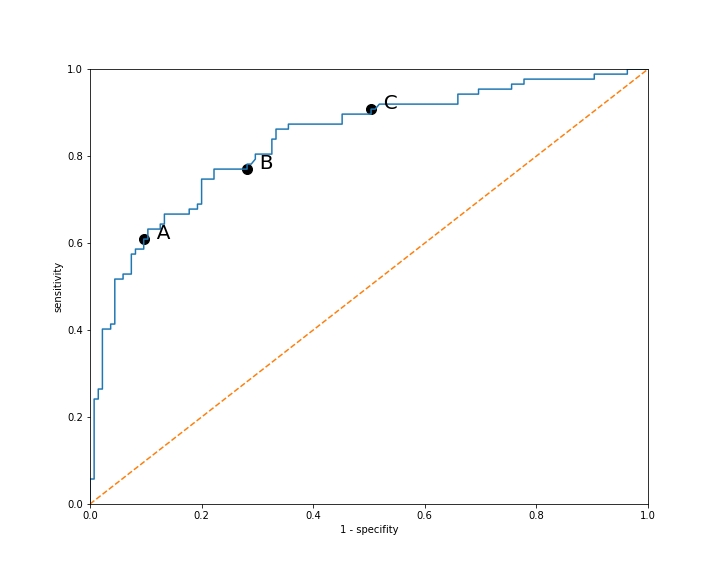

If we are in a situation where it’s more important that all of our positive predictions are correct than that we catch all the positive cases (meaning that we predict most of the negative cases correctly), we should choose the model with higher specificity, we want to make sure when we make a positive prediction that we are accurate (model A)

If we are in a situation where it’s important that we catch as many of the positive cases as possible, we should choose the model with the higher sensitivity (model C).

If we want a balance between sensitivity and specificity, we should choose model B.

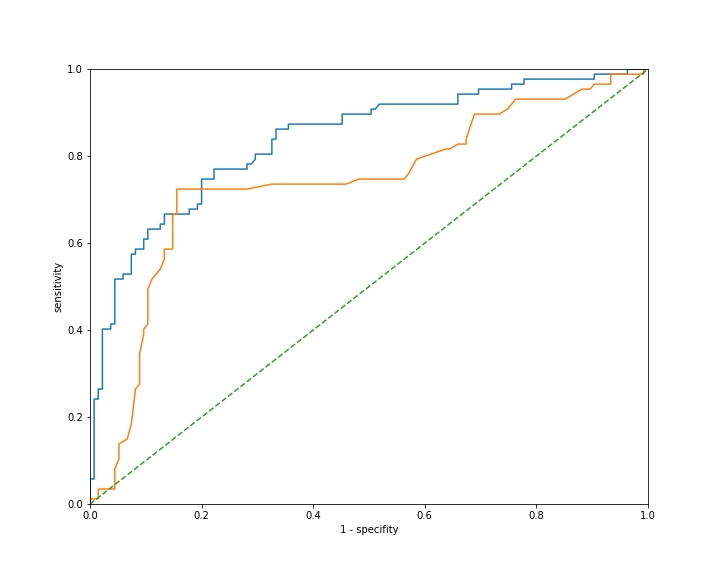

You can see that the blue curve outperforms the orange one since the blue line is almost always above the orange line.

To get an empirical measure of this, we calculate the Area Under the Curve, also called the AUC. This is the area under the ROC curve. It’s a value between 0 and 1, the higher the better.

In [41]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred_proba1 = model1.predict_proba(X_test)
print("model 1 AUC score:", roc_auc_score(y_test, y_pred_proba1[:, 1]))

model2 = LogisticRegression()
model2.fit(X_train[:, 0:2], y_train)
y_pred_proba2 = model2.predict_proba(X_test[:, 0:2])
print("model 1 AUC score:", roc_auc_score(y_test, y_pred_proba2[:, 1]))

model 1 AUC score: 0.8683797909407666
model 1 AUC score: 0.8466463414634146


# K-Fold Cross Validation

In [42]:
model = LogisticRegression()
model.fit(X_train, y_train)

# evaluating the model
y_pred = model.predict(X_test)
print(" accuracy: {0:.5f}".format(accuracy_score(y_test, y_pred)))
print("precision: {0:.5f}".format(precision_score(y_test, y_pred)))
print("   recall: {0:.5f}".format(recall_score(y_test, y_pred)))
print(" f1 score: {0:.5f}".format(f1_score(y_test, y_pred)))

 accuracy: 0.82883
precision: 0.79730
   recall: 0.71951
 f1 score: 0.75641


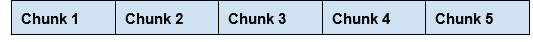

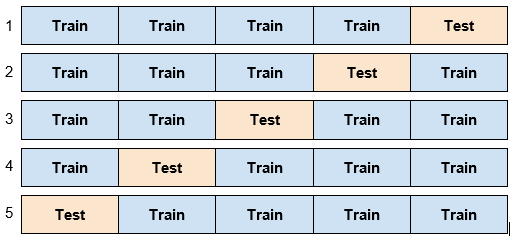

In the previous part we saw how we could make 5 test sets, each with a different training set.

Now, for each training set, we build a model and evaluate it using the associated test set. Thus we build 5 models and calculate 5 scores.

Let’s say we are trying to calculate the accuracy score for our model.

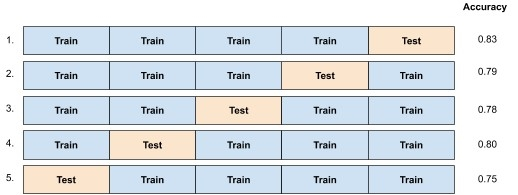

In [44]:
(0.83+0.79+0.78+0.80+0.75)/5    #accuracy as the mean of the five values

0.79

If we had just done a single training and test set and had randomly gotten the first one, we would have reported an accuracy of 0.83. If we had randomly gotten the last one, we would have reported an accuracy of 0.75. Averaging all these possible values helps eliminate the impact of which test set a datapoint lands in . ( Only for small datasets )

This process for creating multiple training and test sets is called k-fold cross validation. The k is the number of chunks we split our dataset into. The standard number is 5, as we did in our example above

These 5 models were built just for evaluation purposes, so that we can report the metric values. We don’t actually need these models and want to build the best possible model. The best possible model is going to be a model that uses all of the data. So we keep track of our calculated values for our evaluation metrics and then build a model using all of the data

In [45]:
X = df[['Age', 'Fare']].values[:6]
y = df['Survived'].values[:6]

In [48]:
kf = KFold(n_splits=3, shuffle=True)

In [51]:
list(kf.split(X))

[(array([0, 3, 4, 5]), array([1, 2])),
 (array([0, 1, 2, 4]), array([3, 5])),
 (array([1, 2, 3, 5]), array([0, 4]))]

In [52]:
splits = list(kf.split(X))
first_split = splits[0]
print(first_split)

(array([0, 2, 4, 5]), array([1, 3]))


In [53]:
train_indices, test_indices = first_split
print("training set indices:", train_indices)
print("test set indices:", test_indices)

training set indices: [0 2 4 5]
test set indices: [1 3]


In [54]:
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

In [55]:
print("X_train")
print(X_train)
print("y_train", y_train)
print("X_test")
print(X_test)
print("y_test", y_test)

X_train
[[22.      7.25  ]
 [26.      7.925 ]
 [35.      8.05  ]
 [27.      8.4583]]
y_train [0 1 0 0]
X_test
[[38.     71.2833]
 [35.     53.1   ]]
y_test [1 1]


In [56]:
model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

1.0


# Looping over

In [57]:
scores = []
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LogisticRegression()
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(scores)

[0.0, 0.0, 1.0, 0.0, 1.0]


In [58]:
print(np.mean(scores))

0.4


In [59]:
final_model = LogisticRegression()
final_model.fit(X, y)

LogisticRegression()